# QUIC-Fire Idealized Grass Dataset EDA
## DSE-260 Group2

Reference: https://github.com/BurnPro3D/data-api-notebooks/blob/main/access-QuicFire-QF-Idealized-Grass-Plots-data.ipynb

## Imports

In [1]:
# !pip install zarr
# !pip install s3fs

In [2]:
import zarr
import s3fs
import matplotlib.image as img
import matplotlib.pyplot as plt
import numpy as np

## Load Data from the Server

In [3]:
s3 = s3fs.S3FileSystem(client_kwargs={
                    "endpoint_url": 'https://wifire-data.sdsc.edu:9000',
                    "verify": False,
                },
                    anon=True
                )

## We are interested in Short Line Ignition at this point
[x for x in s3.ls('public/QF-Idealized-Grass-Plots/') if 'Short' in x]

['public/QF-Idealized-Grass-Plots/ShortLineIgnition_WS1',
 'public/QF-Idealized-Grass-Plots/ShortLineIgnition_WS12',
 'public/QF-Idealized-Grass-Plots/ShortLineIgnition_WS2',
 'public/QF-Idealized-Grass-Plots/ShortLineIgnition_WS3',
 'public/QF-Idealized-Grass-Plots/ShortLineIgnition_WS6']

In [4]:
s3.ls('public/QF-Idealized-Grass-Plots/ShortLineIgnition_WS1/')

['public/QF-Idealized-Grass-Plots/ShortLineIgnition_WS1/Outputs.zarr']

In [97]:
# open data
store = s3fs.S3Map(root='public/QF-Idealized-Grass-Plots/ShortLineIgnition_WS1/Outputs.zarr', s3=s3, check=False, create=False)
zarr_object = zarr.open(store=store)
zarr_object

<zarr.core.Array (301, 200, 200, 5) float16>

### This array has:
- 301 time steps
- 200x200 'horizontal planes' of bulk density
- 5 vertical 'layers' of 200x200 planes

### Let's explore the very bottom layer

In [98]:
bottom = zarr_object[:,:,:,0]

In [99]:
bottom.shape

(301, 200, 200)

#### Lets explore the very beginning of the simulation (first time step)

In [100]:
bottom_t0 = bottom[0, :, :]

In [101]:
bottom_t0

array([[0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0.7, 0.7, ..., 0.7, 0.7, 0. ],
       [0. , 0.7, 0.7, ..., 0.7, 0.7, 0. ],
       ...,
       [0. , 0.7, 0.7, ..., 0.7, 0.7, 0. ],
       [0. , 0.7, 0.7, ..., 0.7, 0.7, 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ]], dtype=float16)

In [102]:
# and lets explore the 'middle square' of this array
bottom_t0[95:105, 95:105]

array([[0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7],
       [0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7],
       [0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7],
       [0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7],
       [0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7],
       [0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7],
       [0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7],
       [0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7],
       [0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7],
       [0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7]], dtype=float16)

#### Lets show that, the array has 0 bulk density on the borders of the area and 0.7 desity everywhere else:

In [103]:
# average bulk density of the square, excluding the borders
print(bottom_t0[1:199, 1:199].mean())
print(bottom_t0[1:199, 1:199].std())

0.7
0.0


In [104]:
# average bulk density of the square, including the borders
print(bottom_t0[1:199, 0].mean())
print(bottom_t0[1:199, 0].std())
print(bottom_t0[1:199, 199].mean())
print(bottom_t0[1:199, 199].std())
print(bottom_t0[0, 1:199].mean())
print(bottom_t0[0, 1:199].std())
print(bottom_t0[0, 1:199].mean())
print(bottom_t0[0, 1:199].std())

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


#### Plot bottom layer when T=0:

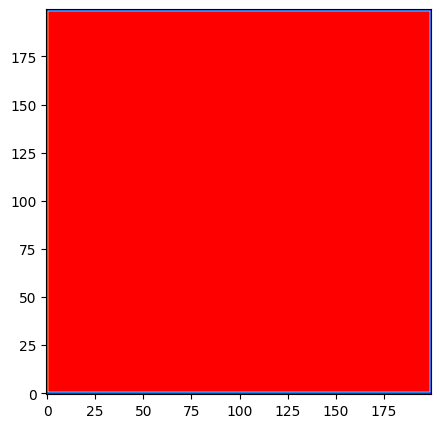

In [105]:
plt.imshow(bottom_t0,cmap='rainbow',origin="lower")

#### Low lets try the same when T = 65 (in the middle)

In [106]:
bottom_t1 = bottom[65, :, :]
# # cut the borders
# bottom_t1 = bottom_t1[1:199, 1:199]

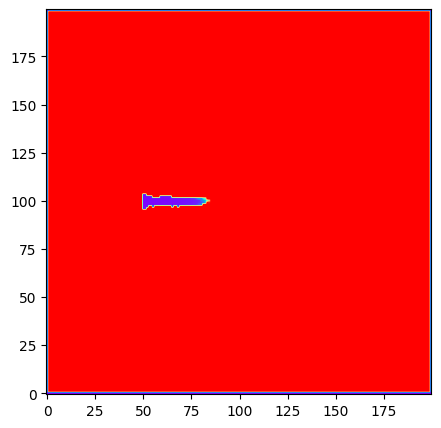

In [107]:
plt.imshow(bottom_t1,cmap='rainbow',origin="lower") 

In [108]:
# Look at the 'area while/after fire' 
bottom_t1_ignited = bottom_t1[90:110, 45:80]

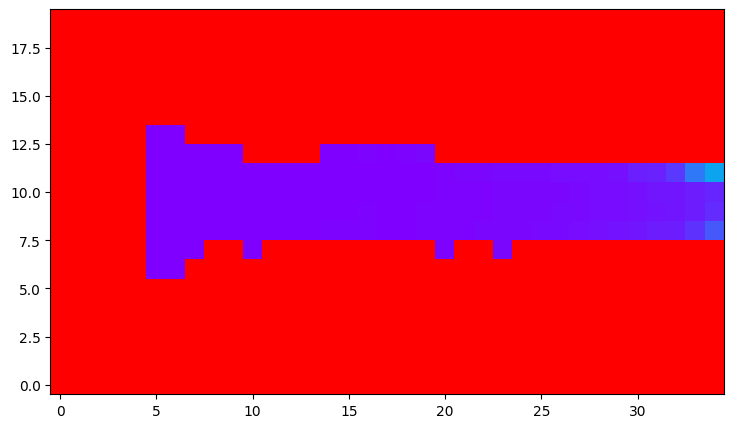

In [109]:
plt.imshow(bottom_t1_ignited,cmap='rainbow',origin="lower")

In [110]:
bottom_t1_ignited[10:15, 5:10]

array([[0.00604 , 0.0061  , 0.006172, 0.006145, 0.00619 ],
       [0.006077, 0.006084, 0.006172, 0.006317, 0.006165],
       [0.00617 , 0.006134, 0.006226, 0.006283, 0.006683],
       [0.00611 , 0.006294, 0.7     , 0.7     , 0.7     ],
       [0.7     , 0.7     , 0.7     , 0.7     , 0.7     ]], dtype=float16)

In [111]:
bottom_t1_ignited.mean()

0.562

In [112]:
bottom_t1_ignited.std()

0.275

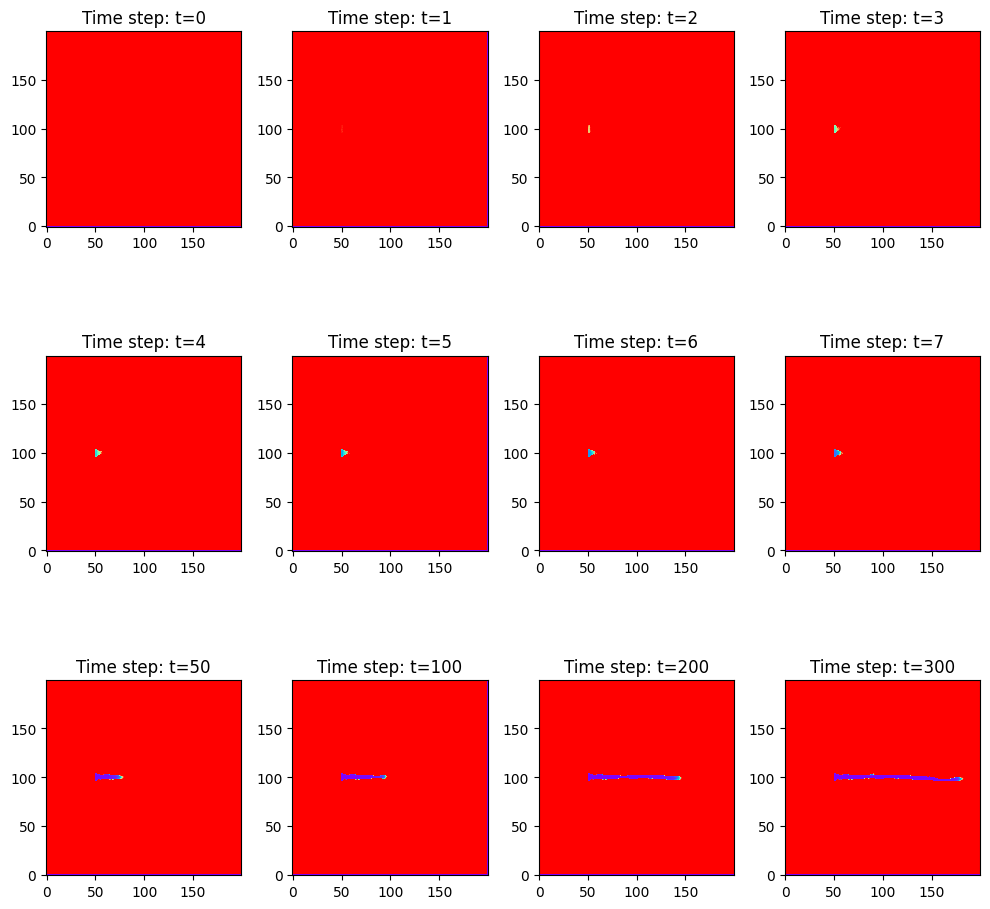

In [115]:
data = np.float32(bottom)
fig, axs = plt.subplots(3, 4,figsize=(10,10))
times=[0,1,2,3,4,5,6,7,50,100,200,300]

for i, ax in enumerate(axs.flatten()):
    ax.set_title(f"Time step: t={times[i]}")
    ax.imshow(data[times[i],:,:],cmap='rainbow',origin="lower")
fig.tight_layout()  

#### Explore bulk density mean over time:

Text(0, 0.5, 'mean bulk density')

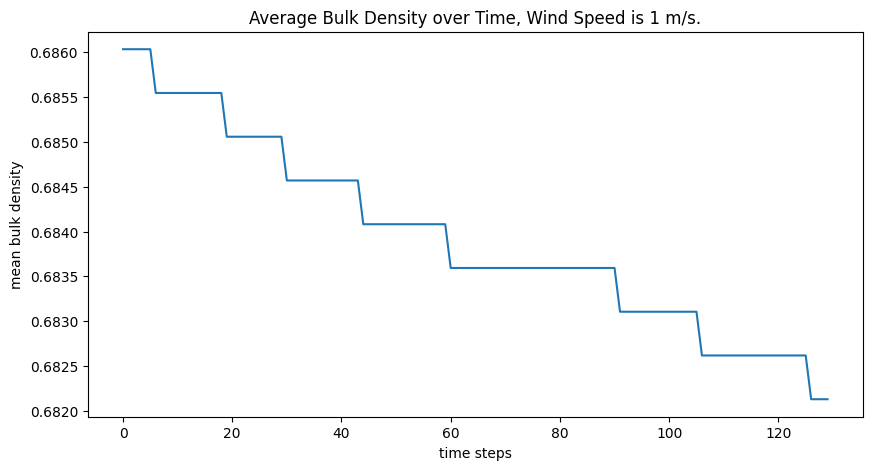

In [117]:
mean_over_time_1 = [ bottom[x,:,:].mean() for x in range(130)]
time_1 = [x for x in range(130)]
plt.plot(time_1, mean_over_time_1)
plt.title(f'Average Bulk Density over Time, Wind Speed is 1 m/s.')
plt.xlabel('time steps')
plt.ylabel('mean bulk density')

In [120]:
# difference over time
max(mean_over_time_1)-min(mean_over_time_1)

0.003906

### Now let's explore the simulation with wind speed = 12

(17, 200, 200)


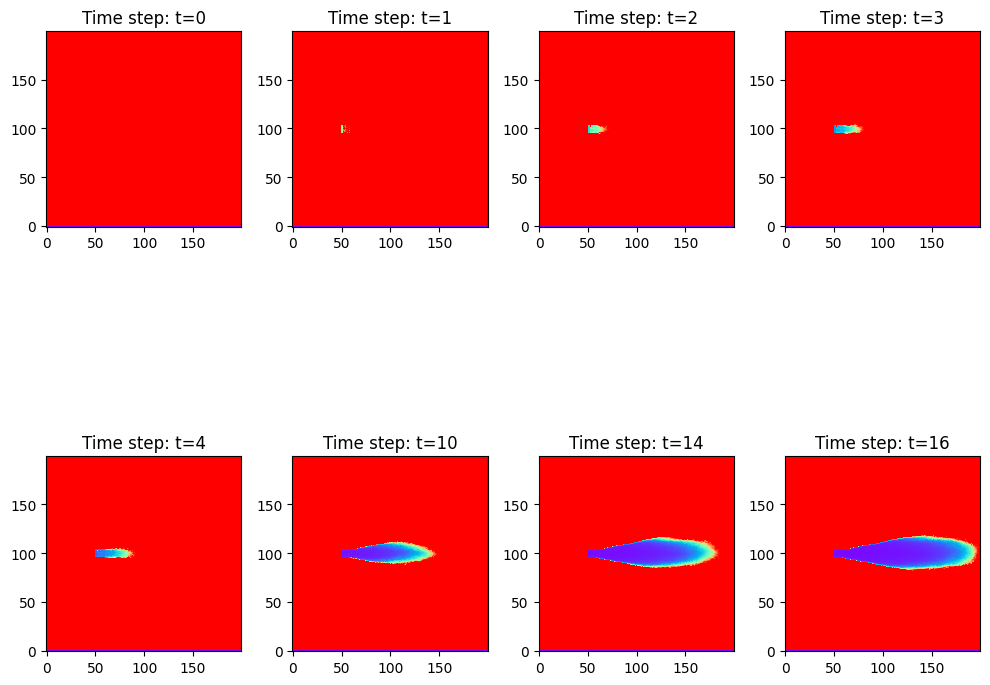

In [121]:
store = s3fs.S3Map(root='public/QF-Idealized-Grass-Plots/ShortLineIgnition_WS12/Outputs.zarr', s3=s3, check=False, create=False)
zarr_object_12 = zarr.open(store=store)
bottom_12 = zarr_object_12[:,:,:,0]
print(bottom_12.shape)
data = np.float32(bottom_12)
fig, axs = plt.subplots(2, 4,figsize=(10,10))
times=[0,1,2,3,4,10,14,16]

for i, ax in enumerate(axs.flatten()):
    ax.set_title(f"Time step: t={times[i]}")
    ax.imshow(data[times[i],:,:],cmap='rainbow',origin="lower")
fig.tight_layout()

Text(0, 0.5, 'mean bulk density')

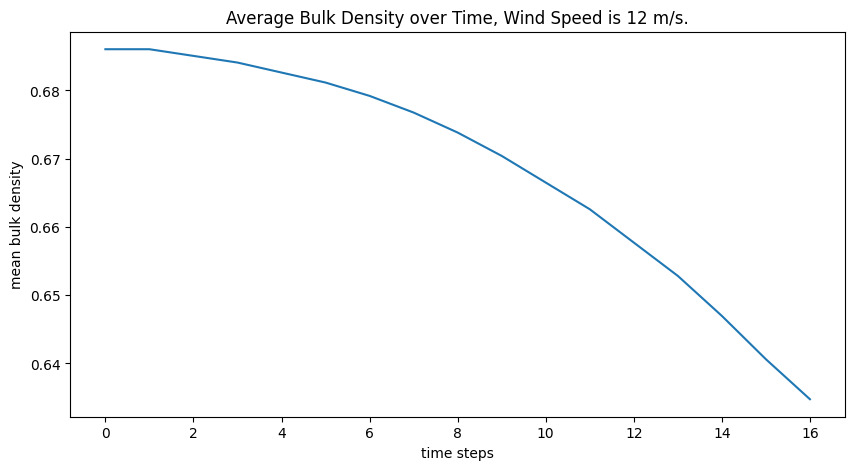

In [122]:
mean_over_time_12 = [ bottom_12[x,:,:].mean() for x in range(17)]
time_12 = [x for x in range(17)]
plt.plot(time_12, mean_over_time_12)
plt.title('Average Bulk Density over Time, Wind Speed is 12 m/s.')
plt.xlabel('time steps')
plt.ylabel('mean bulk density')

In [123]:
# difference over time
max(mean_over_time_12)-min(mean_over_time_12)

0.05127

#### We can see from the plots that average bulk density decreases as a result of burning:
- Wind Speed of 1 m/s: 0.003906 in 3000 sec
- Wind Speed of 1 m/s: 0.05127 in 160 sec

Which makes sense intuitevely, because higher wind speed increases the speed of burning.